<a href="https://colab.research.google.com/github/2303A52439/AIML_2303A52439/blob/main/AIML_LAB_EXAM_(_2439_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K.Vignanand Rao

2303A52439

Batch 41

1. Apply KNN on a classification dataset with k=3 and evaluate its accuracy.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
dataset_path = "/content/loan_data.csv"
data = pd.read_csv(dataset_path)
print(data.head())
label_columns = ['purpose']
label_encoder = LabelEncoder()
data['purpose'] = label_encoder.fit_transform(data['purpose'])
X = data.drop(columns=['not.fully.paid'])
y = data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with KNN (k=3): {accuracy:.2f}")

   credit.policy             purpose  int.rate  ...  delinq.2yrs  pub.rec  not.fully.paid
0              1  debt_consolidation    0.1189  ...            0        0               0
1              1         credit_card    0.1071  ...            0        0               0
2              1  debt_consolidation    0.1357  ...            0        0               0
3              1  debt_consolidation    0.1008  ...            0        0               0
4              1         credit_card    0.1426  ...            1        0               0

[5 rows x 14 columns]
Accuracy with KNN (k=3): 0.81


2. Visualize the decision boundary for KNN with k=3.

   credit.policy             purpose  int.rate  ...  delinq.2yrs  pub.rec  not.fully.paid
0              1  debt_consolidation    0.1189  ...            0        0               0
1              1         credit_card    0.1071  ...            0        0               0
2              1  debt_consolidation    0.1357  ...            0        0               0
3              1  debt_consolidation    0.1008  ...            0        0               0
4              1         credit_card    0.1426  ...            1        0               0

[5 rows x 14 columns]


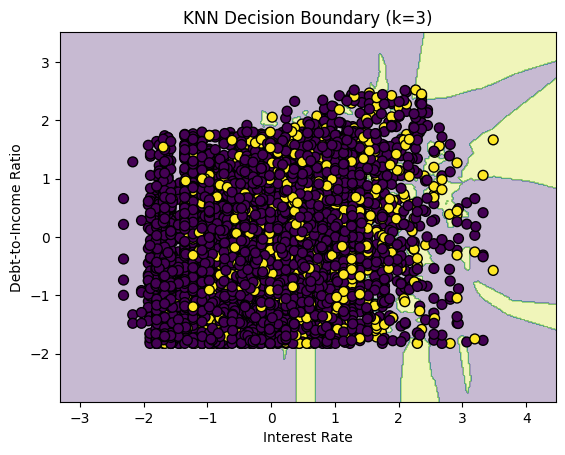

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
dataset_path = "/content/loan_data.csv"
data = pd.read_csv(dataset_path)
print(data.head())
label_columns = ['purpose']
label_encoder = LabelEncoder()
data['purpose'] = label_encoder.fit_transform(data['purpose'])
X_2D = data[['int.rate', 'dti']].values
y = data['not.fully.paid']
X_train_2D, X_test_2D, y_train, y_test = train_test_split(X_2D, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_2D = scaler.fit_transform(X_train_2D)
X_test_2D = scaler.transform(X_test_2D)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_2D, y_train)
h = .02
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, marker='o', edgecolor='k', s=50)
plt.title('KNN Decision Boundary (k=3)')
plt.xlabel('Interest Rate')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

3. Split the dataset into training and testing sets and compute the confusion
matrix.

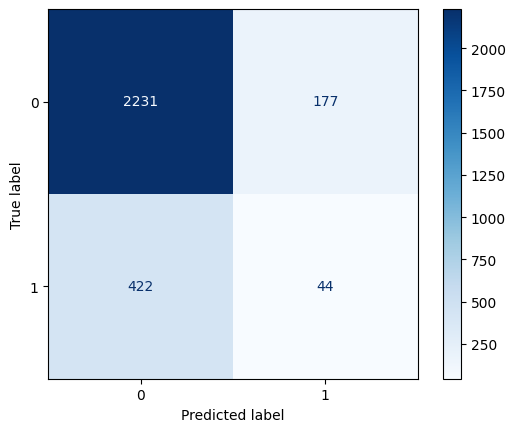

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_k3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_k3.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

4. Compare the performance of KNN with and without feature scaling

Accuracy with scaling: 0.81
Accuracy without scaling: 0.79


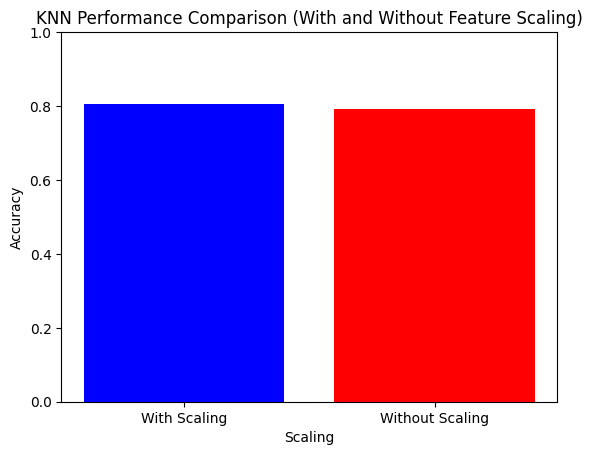

In [39]:
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Accuracy with scaling: {accuracy_scaled:.2f}")
print(f"Accuracy without scaling: {accuracy_no_scaling:.2f}")
scaling_comparison = ['With Scaling', 'Without Scaling']
accuracy_comparison = [accuracy_scaled, accuracy_no_scaling]
plt.bar(scaling_comparison, accuracy_comparison, color=['blue', 'red'])
plt.title('KNN Performance Comparison (With and Without Feature Scaling)')
plt.xlabel('Scaling')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

5. Tune the value of k (e.g., test with k=5) and compare performance

   credit.policy             purpose  int.rate  ...  delinq.2yrs  pub.rec  not.fully.paid
0              1  debt_consolidation    0.1189  ...            0        0               0
1              1         credit_card    0.1071  ...            0        0               0
2              1  debt_consolidation    0.1357  ...            0        0               0
3              1  debt_consolidation    0.1008  ...            0        0               0
4              1         credit_card    0.1426  ...            1        0               0

[5 rows x 14 columns]
Accuracy with KNN (k=3): 0.80
Accuracy with KNN (k=5): 0.82


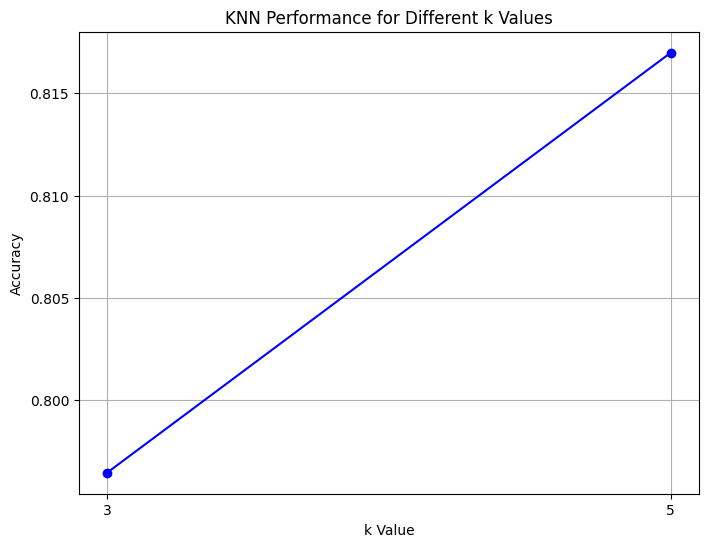

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
dataset_path = "/content/loan_data.csv"
data = pd.read_csv(dataset_path)
print(data.head())
label_columns = ['purpose']
label_encoder = LabelEncoder()
data['purpose'] = label_encoder.fit_transform(data['purpose'])
X = data[['int.rate', 'dti']].values
y = data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
def evaluate_knn(k_values, X_train, X_test, y_train, y_test):
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return accuracies
k_values = [3, 5]
accuracies = evaluate_knn(k_values, X_train_scaled, X_test_scaled, y_train, y_test)
for k, accuracy in zip(k_values, accuracies):
    print(f"Accuracy with KNN (k={k}): {accuracy:.2f}")
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Performance for Different k Values')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()